<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [8]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [10]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
data = await resp.text()
boston_url = io.StringIO(data)


In [11]:
boston_df = pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


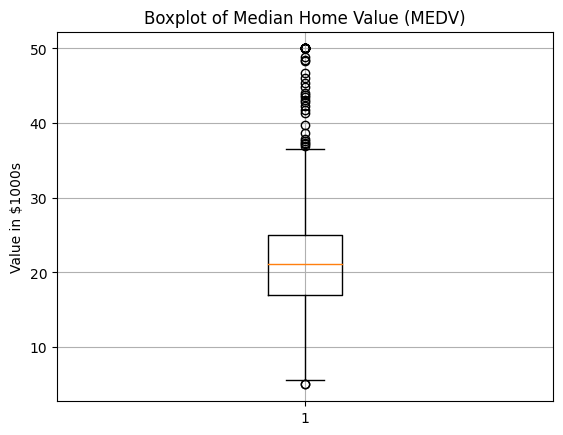

In [12]:
pyplot.boxplot(boston_df['MEDV'])
pyplot.title('Boxplot of Median Home Value (MEDV)')
pyplot.ylabel('Value in $1000s')
pyplot.grid(True)
pyplot.show()

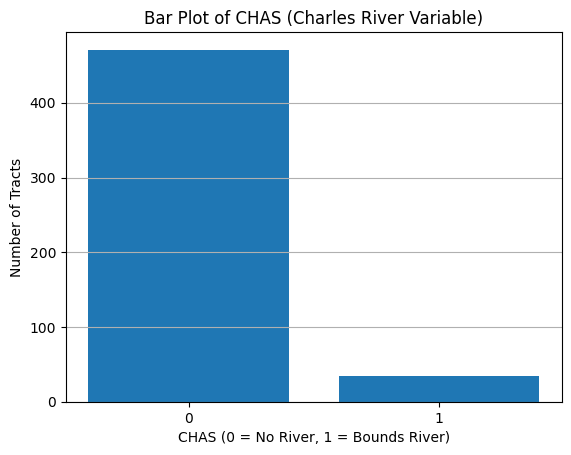

In [13]:
chas_counts = boston_df['CHAS'].value_counts().sort_index()
pyplot.bar(chas_counts.index, chas_counts.values)
pyplot.title('Bar Plot of CHAS (Charles River Variable)')
pyplot.xlabel('CHAS (0 = No River, 1 = Bounds River)')
pyplot.ylabel('Number of Tracts')
pyplot.xticks([0, 1])
pyplot.grid(axis='y')
pyplot.show()

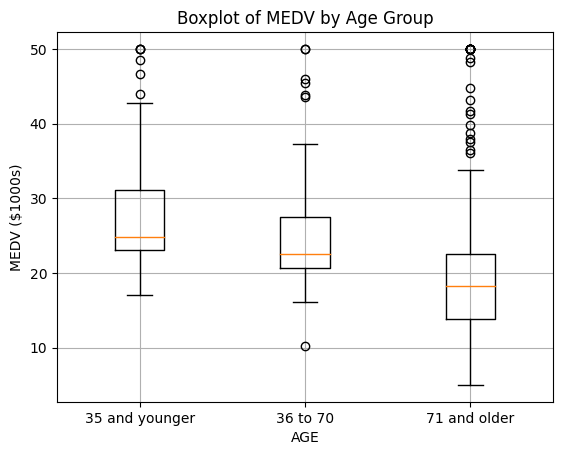

In [14]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', '36 to 70', '71 and older'])
medv_by_group = [boston_df[boston_df['AGE_group'] == group]['MEDV'] 
                 for group in boston_df['AGE_group'].cat.categories]
pyplot.boxplot(medv_by_group, labels=boston_df['AGE_group'].cat.categories)
pyplot.title('Boxplot of MEDV by Age Group')
pyplot.xlabel('AGE')
pyplot.ylabel('MEDV ($1000s)')
pyplot.grid(True)
pyplot.show()

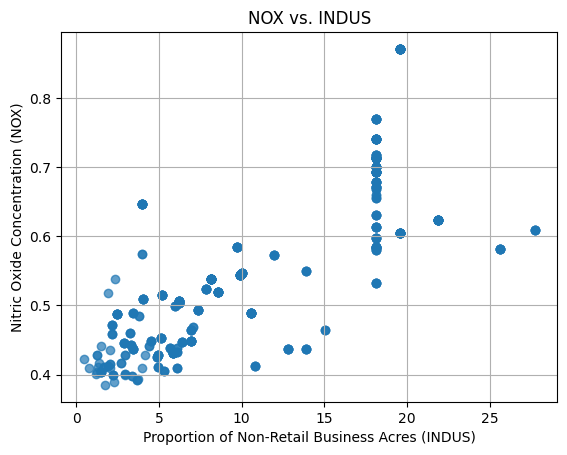

In [15]:
pyplot.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.7)
pyplot.title('NOX vs. INDUS')
pyplot.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.ylabel('Nitric Oxide Concentration (NOX)')
pyplot.grid(True)
pyplot.show()

As per the scatter plot above there is an upward trend and hence a correlation between nitric oxide concentrations and proportion of non-retail business acres per town

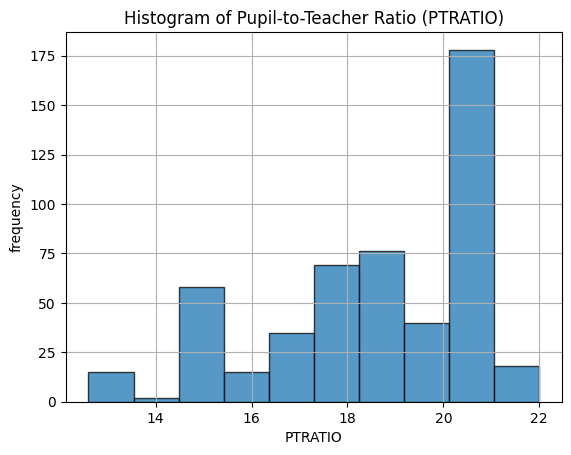

In [17]:
pyplot.hist(boston_df['PTRATIO'], bins=10, edgecolor='black', alpha=0.75)
pyplot.title('Histogram of Pupil-to-Teacher Ratio (PTRATIO)')
pyplot.xlabel('PTRATIO')
pyplot.ylabel('frequency')
pyplot.grid(True)
pyplot.show()

**T-test for independent samples**

In [21]:
from scipy.stats import ttest_ind
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_val = ttest_ind(chas_1, chas_0, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: 3.113291312794837
p-value: 0.003567170098137517


The Null hypothesis is that there is no significant difference in means of houses near the river and those not.

t-statistic: 3.11, p-value: 0.0036
Since p-value is lower than 0.05, Ho is rejected:
Homes near the Charles River tend to have higher median values on average

**ANOVA**


In [24]:
from scipy.stats import f_oneway
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['0–35%', '36–70%', '71–100%'])
group1 = boston_df[boston_df['AGE_group'] == '0–35%']['MEDV']
group2 = boston_df[boston_df['AGE_group'] == '36–70%']['MEDV']
group3 = boston_df[boston_df['AGE_group'] == '71–100%']['MEDV']
f_stat, p_value = f_oneway(group1, group2, group3)
print(f"f-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4e}")

f-statistic: 36.4076
p-value: 1.7105e-15


p-value is very low, lower than 0.05, which means that at least one of the groups' means is significantly different

**Pearson Correlation**

In [29]:
from scipy.stats import pearsonr
nox = boston_df['NOX'] 
indus = boston_df['INDUS']
corr_coefficient, p_value = pearsonr(nox, indus)
print(f"correlation coefficient: {corr_coefficient:.4f}")
print(f"p-value: {p_value:.4e}")

correlation coefficient: 0.7637
p-value: 7.9134e-98


moderate but imperfect positive correlation, p-value lower then 0.05 so statistically significant finding that there is a relationshp between Nitric oxide concentrations and proportion of non-retail business acres per town

**Regression Analysis**

In [32]:
X = boston_df['DIS']
y = boston_df['MEDV']   
X = sm.add_constant(X)
model = sm.OLS(y, X).fit() #OLS is the ordinart least squares model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 07 May 2025   Prob (F-statistic):           1.21e-08
Time:                        14:39:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

A single unit increase in DIS causes a 1.0916 increase in MEDV, this means that a greater distnace from employment centres is slightly correlated with a higher MEDV. However, the R-squared value of 0.062 means that change in DIS is responsible for only 6.2% of the variance in MEDV but with very high confidence due to the extremely low p-value (almost zero/<0.0001) 